### Initial Import for Standard Libraries

In [0]:
# importing libraries.!!

import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [0]:
#Load the Data

df = pd.read_csv('./heart.csv')

_____________

In [183]:
#Evaluating Non Zero Columns

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are No Columns that have Non Zero Value

In [184]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


____________________

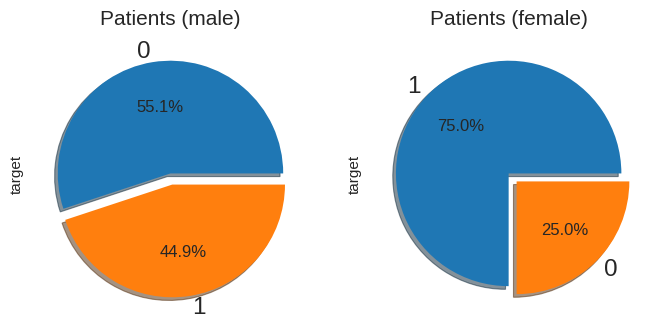

In [185]:
f,ax=plt.subplots(1,2,figsize=(8,4))

sns.set_context("paper", font_scale = 2, rc = {"font.size": 12,"axes.titlesize": 15,"axes.labelsize": 12}) 

df.loc[df['sex']==1, 'target'].value_counts().plot.pie(explode=[0,0.10],autopct='%1.1f%%',ax=ax[0],shadow=True)
df.loc[df['sex']==0, 'target'].value_counts().plot.pie(explode=[0,0.10],autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[0].set_title('Patients (male)')
ax[1].set_title('Patients (female)')

plt.show()

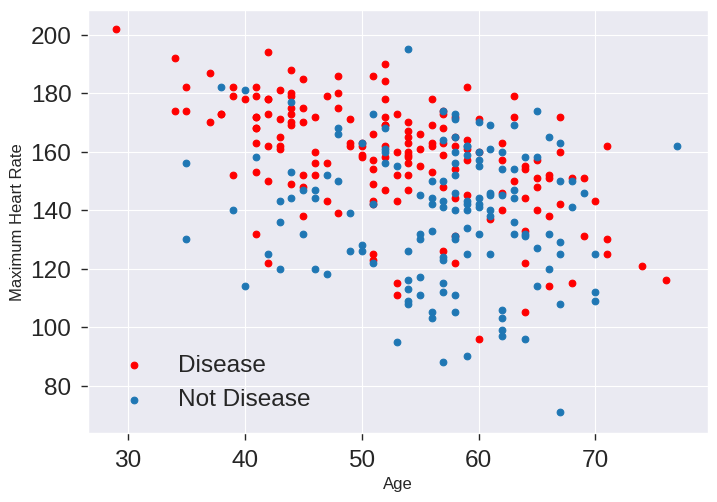

In [186]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

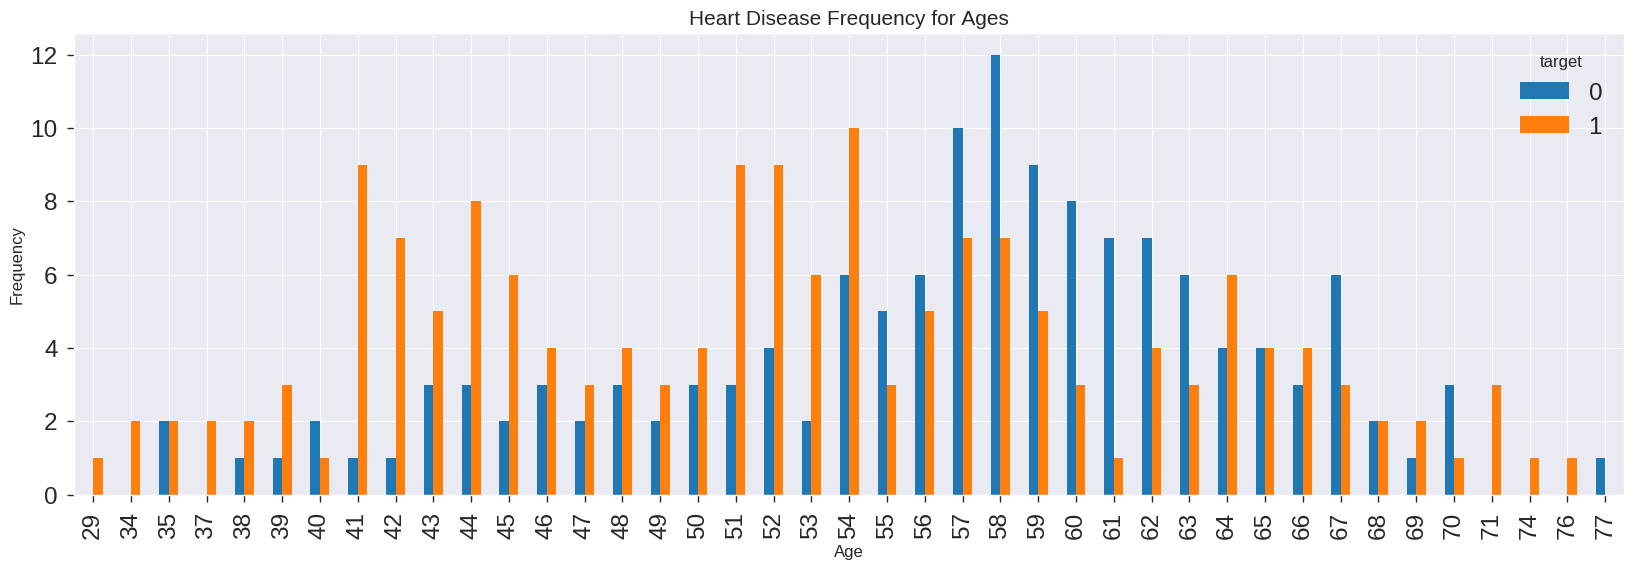

In [187]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

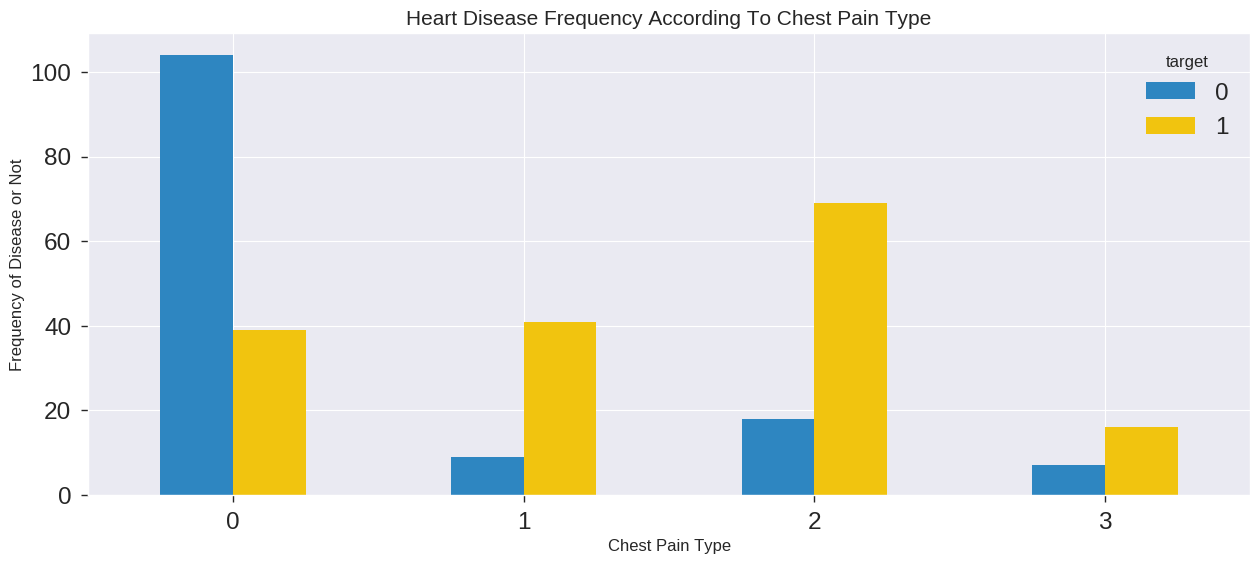

In [188]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#2E86C1','#F1C40F' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

Use Pandas Profiling to Improve EDA for data.

In [189]:
pip install pandas-profiling

In [0]:
import pandas_profiling

In [191]:
pandas_profiling.ProfileReport(df)

Number of variables,14
Number of observations,303
Total Missing (%),0.0%
Total size in memory,33.3 KiB
Average record size in memory,112.4 B
Numeric,10
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


__________________________________________________

Plot the Split of Diseases across Male and Female

In [192]:
print("{} % of Women Suffer from Heart Diseases".format(100*(df.loc[df.sex == 0].target.sum()/df.loc[df.sex == 0].target.count())))
print("{} % of Men Suffer from Heart Diseases".format(round(100*(df.loc[df.sex == 1].target.sum()/df.loc[df.sex == 1].target.count()))))

75.0 % of Women Suffer from Heart Diseases
45.0 % of Men Suffer from Heart Diseases


### Train Test Split

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [195]:
X_train

array([[43.,  0.,  2., ...,  1.,  0.,  2.],
       [66.,  0.,  2., ...,  1.,  1.,  2.],
       [58.,  1.,  2., ...,  2.,  0.,  2.],
       ...,
       [56.,  1.,  3., ...,  1.,  0.,  3.],
       [47.,  1.,  2., ...,  2.,  0.,  2.],
       [58.,  1.,  1., ...,  1.,  0.,  2.]])

______________________________

## Model Evaluation

In [0]:
# Importing Models that needs to be evaluated

from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [0]:
# prepare models

model_list = []

In [0]:
model_list.append(('Multinomial NB', MultinomialNB(alpha=0.1)))
model_list.append(('Decision Tree', DecisionTreeClassifier()))
model_list.append(('SVM',SVC(kernel='linear')))
model_list.append(('ADA Boost With Decision Tree', AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
    n_estimators=200)))
model_list.append(('Logistic Regression',LogisticRegression(solver='liblinear')))
model_list.append(('Random Forest',RandomForestClassifier()))

In [0]:
# Variable to Score Results
results = []
names = []
scoring = 'accuracy'
seed = 5

#### Cross Validation Score

In [200]:
# Evaluation of Each Model One by One (Cross Validation Score)

for name, model in model_list:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Multinomial NB: 0.740000 (0.086165)
Decision Tree: 0.764833 (0.073088)
SVM: 0.831000 (0.066396)
ADA Boost With Decision Tree: 0.802333 (0.060755)
Logistic Regression: 0.831167 (0.070392)
Random Forest: 0.814667 (0.067814)


#####  Preparing a DataFrame to Plot the Scores

In [0]:
def insert(df, row):
    insert_loc = df.index.max()
    if np.isnan(insert_loc):
        df.loc[0] = row
    else:
        df.loc[insert_loc + 1] = row

In [202]:
cv_score = df_ = pd.DataFrame(columns = ['Model_Name','CV_Score'])
cv_score.head()

,Model_Name,CV_Score


In [0]:
for key,value in enumerate(results):
        insert(cv_score,[names[key],value.mean()*100])

In [204]:
cv_score

,Model_Name,CV_Score
0,Multinomial NB,74.000000
1,Decision Tree,76.483333
2,SVM,83.100000
3,ADA Boost With Decision Tree,80.233333
4,Logistic Regression,83.116667
5,Random Forest,81.466667


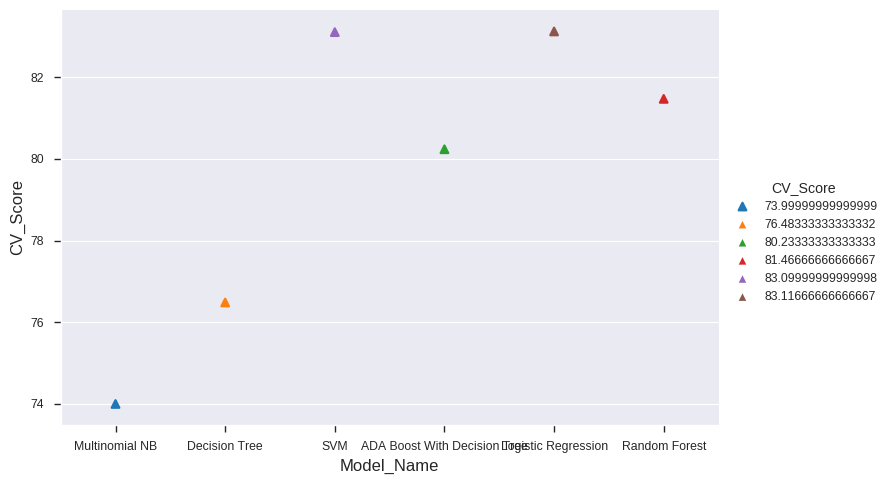

In [205]:
sns.set_context("paper", font_scale = 1, rc = {"font.size": 12,"axes.titlesize": 15,"axes.labelsize": 12}) 
plot = sns.catplot(x="Model_Name", y="CV_Score", hue="CV_Score", kind="point", data=cv_score,height=5,aspect=1.5,markers="^")

### Libaries to explain the Models

In [214]:
pip install eli5

In [0]:
#Libraries for Explaning ML Models

import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance

In [0]:
df1 = df[df.columns.difference(['target'])]

In [0]:
perm_list =[]

In [0]:
# Evaluation of Each Model One by One (Cross Validation Score)

for name, model in model_list:
    model.fit(X_train, y_train)
    perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
    perm_list.append(perm)

In [0]:
for index,value in enumerate(perm_list):
    eli5.show_weights(perm_list[index], feature_names = df1.columns.tolist())

In [220]:
# Feature Importance using MultinomialNB
eli5.show_weights(perm_list[0], feature_names = df1.columns.tolist())

Weight,Feature
0.0230 ± 0.0445,restecg
0.0131 ± 0.0131,ca
0.0098 ± 0.0533,chol
0.0033 ± 0.0382,slope
0 ± 0.0000,trestbps
0 ± 0.0000,thal
0 ± 0.0000,fbs
-0.0033 ± 0.0321,sex
-0.0098 ± 0.0161,oldpeak
-0.0131 ± 0.0131,exang


In [221]:
# Feature Importance using DecisionTreeClassifier
eli5.show_weights(perm_list[1], feature_names = df1.columns.tolist())

Weight,Feature
0.0787 ± 0.0564,chol
0.0754 ± 0.0445,restecg
0.0590 ± 0.0161,trestbps
0.0459 ± 0.0435,age
0.0164 ± 0.0415,exang
0.0131 ± 0.0131,thal
0.0131 ± 0.0131,oldpeak
0.0131 ± 0.0435,thalach
0.0066 ± 0.0161,slope
0.0033 ± 0.0245,cp


In [222]:
# Feature Importance using SVM
eli5.show_weights(perm_list[2], feature_names = df1.columns.tolist())

Weight,Feature
0.0164 ± 0.0293,trestbps
0.0164 ± 0.0464,ca
0.0131 ± 0.0759,slope
0.0131 ± 0.0482,chol
0.0033 ± 0.0525,thalach
0 ± 0.0000,thal
0 ± 0.0000,exang
0 ± 0.0000,age
-0.0033 ± 0.0131,cp
-0.0066 ± 0.0161,oldpeak


In [223]:
# Feature Importance using AdaBoostClassifier
eli5.show_weights(perm_list[3], feature_names = df1.columns.tolist())

Weight,Feature
0.0787 ± 0.0382,chol
0.0754 ± 0.0675,trestbps
0.0656 ± 0.0549,age
0.0492 ± 0.0359,slope
0.0492 ± 0.0207,ca
0.0328 ± 0.0994,thalach
0.0164 ± 0.0415,restecg
0.0131 ± 0.0435,exang
0.0131 ± 0.0245,fbs
0.0066 ± 0.0262,thal


In [224]:
# Feature Importance using LogisticRegression
eli5.show_weights(perm_list[4], feature_names = df1.columns.tolist())

Weight,Feature
0.0918 ± 0.0334,chol
0.0492 ± 0.0464,ca
0.0328 ± 0.0207,trestbps
0.0262 ± 0.0334,restecg
0.0197 ± 0.0525,slope
0.0164 ± 0.0549,thalach
0.0164 ± 0.0207,thal
0.0131 ± 0.0131,exang
0.0066 ± 0.0161,cp
0 ± 0.0000,fbs


In [225]:
# Feature Importance using RandomForestClassifier
eli5.show_weights(perm_list[5], feature_names = df1.columns.tolist())

Weight,Feature
0.1082 ± 0.0894,trestbps
0.0262 ± 0.0572,thalach
0.0066 ± 0.0262,sex
0.0066 ± 0.0262,exang
0.0066 ± 0.0262,ca
0.0033 ± 0.0382,restecg
-0.0066 ± 0.0334,chol
-0.0098 ± 0.0161,oldpeak
-0.0098 ± 0.0161,fbs
-0.0098 ± 0.0262,age


### Accuracy & RoC Curve

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [0]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

In [0]:
sns.set_context("paper", font_scale = 1.5, rc = {"font.size": 11,"axes.titlesize": 14,"axes.labelsize": 11}) 

#### Random Forest

In [229]:
RandomForestClassifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
RandomForestClassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<Figure size 800x550 with 0 Axes>

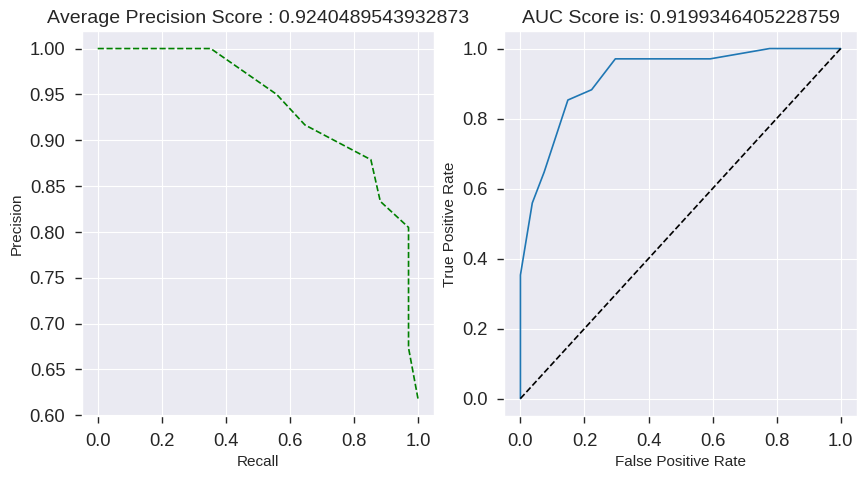

<Figure size 800x550 with 0 Axes>

In [230]:
plotting(y_test,RandomForestClassifier.predict_proba(X_test))
plt.figure()

#### MultinomialNB

In [231]:
MultinomialNB = MultinomialNB(alpha=0.1)
MultinomialNB.fit(X_train,y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

<Figure size 800x550 with 0 Axes>

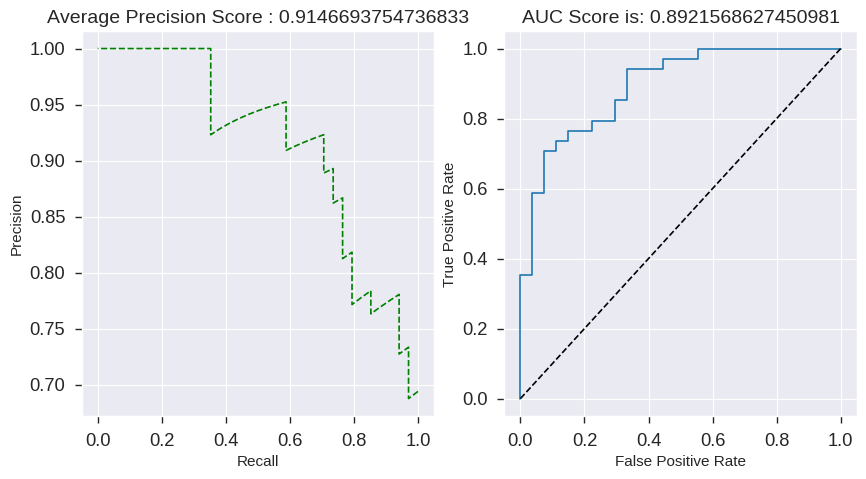

<Figure size 800x550 with 0 Axes>

In [232]:
plotting(y_test,MultinomialNB.predict_proba(X_test))
plt.figure()

#### DecisionTreeClassifier

In [233]:
DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<Figure size 800x550 with 0 Axes>

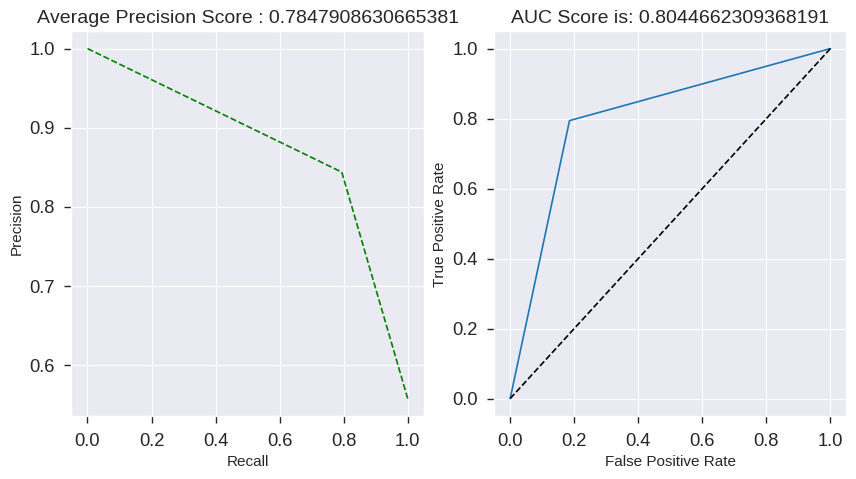

<Figure size 800x550 with 0 Axes>

In [234]:
plotting(y_test,DecisionTreeClassifier.predict_proba(X_test))
plt.figure()

#### Linear SVC

In [235]:
LinearSVC = SVC(kernel='linear',probability=True)
LinearSVC.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

<Figure size 800x550 with 0 Axes>

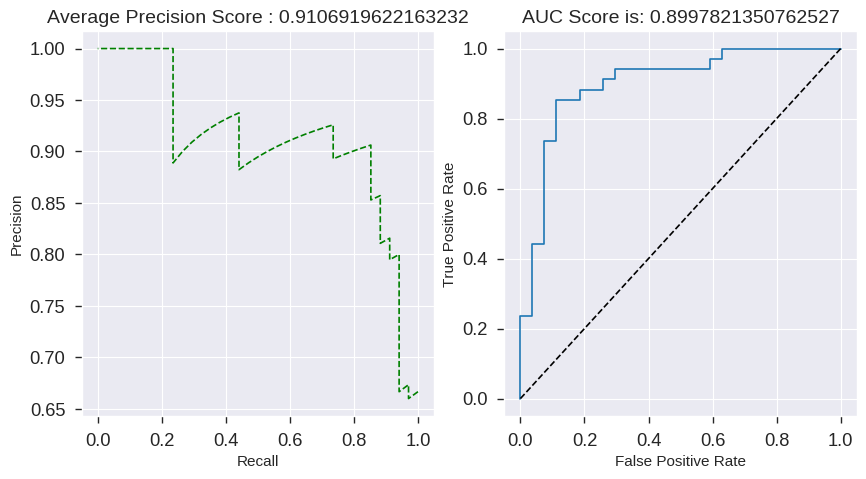

<Figure size 800x550 with 0 Axes>

In [236]:
plotting(y_test,LinearSVC.predict_proba(X_test))
plt.figure()

#### AdaBoostClassifier

In [237]:
AdaBoostClassifier = AdaBoostClassifier()
AdaBoostClassifier.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

<Figure size 800x550 with 0 Axes>

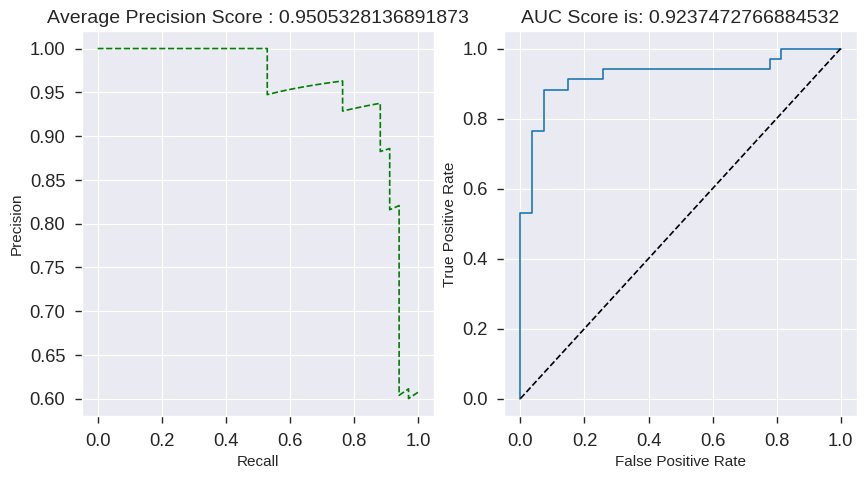

<Figure size 800x550 with 0 Axes>

In [238]:
plotting(y_test,AdaBoostClassifier.predict_proba(X_test))
plt.figure()

### LogisticRegression

In [239]:
LogisticRegression = LogisticRegression(solver='liblinear')
LogisticRegression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

<Figure size 800x550 with 0 Axes>

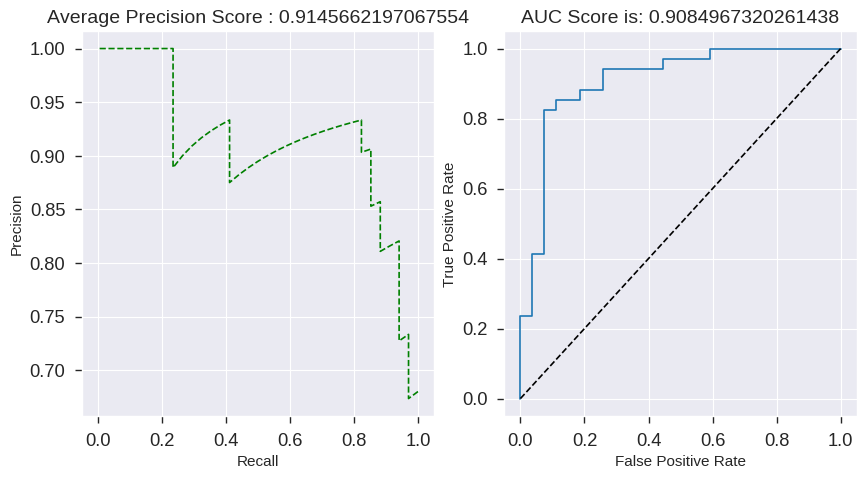

<Figure size 800x550 with 0 Axes>

In [240]:
plotting(y_test,LogisticRegression.predict_proba(X_test))
plt.figure()